# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from utils import show_dtypes

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [4]:
books = pd.read_parquet("./goodsread/books.parquet")

In [5]:
books.shape

(43312, 19)

In [6]:
books.head()

,book_id,author,title,description,genre_and_votes,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_year,country_code,language_code,format,is_ebook,isbn,isbn13,genre_and_votes_dict,genre_and_votes_str
3,6066819,Jennifer Weiner,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"{'Womens Fiction-Chick Lit': 739, 'Fiction': 442}",368,3.49,51184,3282,Atria Books,2009,US,eng,Hardcover,False,0743294297,9780743294294,"{'Academic': None, 'Academic-Academia': None, ...","Womens Fiction-Chick Lit 739, Fiction 442"
6,378460,Michael Halberstam,The Wanting of Levine,,"{'Politics': 1, 'Humor': 1}",<NA>,4.38,12,4,Berkley Publishing Group,1979,US,,Paperback,False,0425040887,9780425040881,"{'Academic': None, 'Academic-Academia': None, ...","Politics 1user, Humor 1user"
15,89375,"Don Piper, Cecil Murphey",90 Minutes in Heaven: A True Story of Death an...,As he is driving home from a minister's confer...,"{'Christian': 395, 'Nonfiction': 392, 'Religio...",<NA>,3.91,68157,2885,,<NA>,US,,,False,0800759494,9780800759490,"{'Academic': None, 'Academic-Academia': None, ...","Christian 395, Nonfiction 392, Religion 142, S..."
16,89376,Randy Alcorn,Heaven,What is Heaven really going to be like? What w...,"{'Christian': 225, 'Religion-Theology': 154, '...",533,4.26,7345,566,,<NA>,US,eng,,False,0842379428,9780842379427,"{'Academic': None, 'Academic-Academia': None, ...","Christian 225, Religion-Theology 154, Nonficti..."
17,89377,Jennifer L. Holm,Penny from Heaven,It's 1953 and 11-year-old Penny dreams of a su...,"{'Historical-Historical Fiction': 284, 'Childr...",288,3.98,6949,615,Random House Books for Young Readers,2006,US,,Hardcover,False,037583687X,9780375836879,"{'Academic': None, 'Academic-Academia': None, ...","Historical-Historical Fiction 284, Childrens-M..."


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [8]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [9]:
interactions = pd.read_parquet("./goodsread/interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [10]:
interactions.shape

(12890434, 7)

In [11]:
interactions.head()

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
0,8842281e1d1347389f2ab93d60773d4d,22034,2015-07-12,2015-07-17,True,5,False
1,8842281e1d1347389f2ab93d60773d4d,22318578,2015-06-07,2015-08-09,True,5,True
2,8842281e1d1347389f2ab93d60773d4d,22551730,2015-06-24,2015-07-11,True,4,True
3,8842281e1d1347389f2ab93d60773d4d,22816087,2015-09-27,2015-11-04,True,5,True
4,8842281e1d1347389f2ab93d60773d4d,20527133,2015-05-05,2015-09-06,True,0,False


In [12]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [13]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

In [14]:
books.shape

(43312, 19)

Посмотрим на данные о книгах, какие поля есть.

In [15]:
show_dtypes(books)

,index,type,isna,3,6,15
0,num_pages,Int64,6311,368,<NA>,<NA>
1,ratings_count,Int64,0,51184,12,68157
2,publication_year,Int64,7421,2009,1979,<NA>
3,is_ebook,bool,0,False,False,False
4,average_rating,float64,0,3.49,4.38,3.91
5,book_id,int64,0,6066819,378460,89375
6,text_reviews_count,int64,0,3282,4,2885
7,isbn13,object,0,9780743294294,9780425040881,9780800759490
8,isbn,object,0,0743294297,0425040887,0800759494
9,format,object,0,Hardcover,Paperback,


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [16]:
books["book_id"].nunique()

43312

## Книги по годам

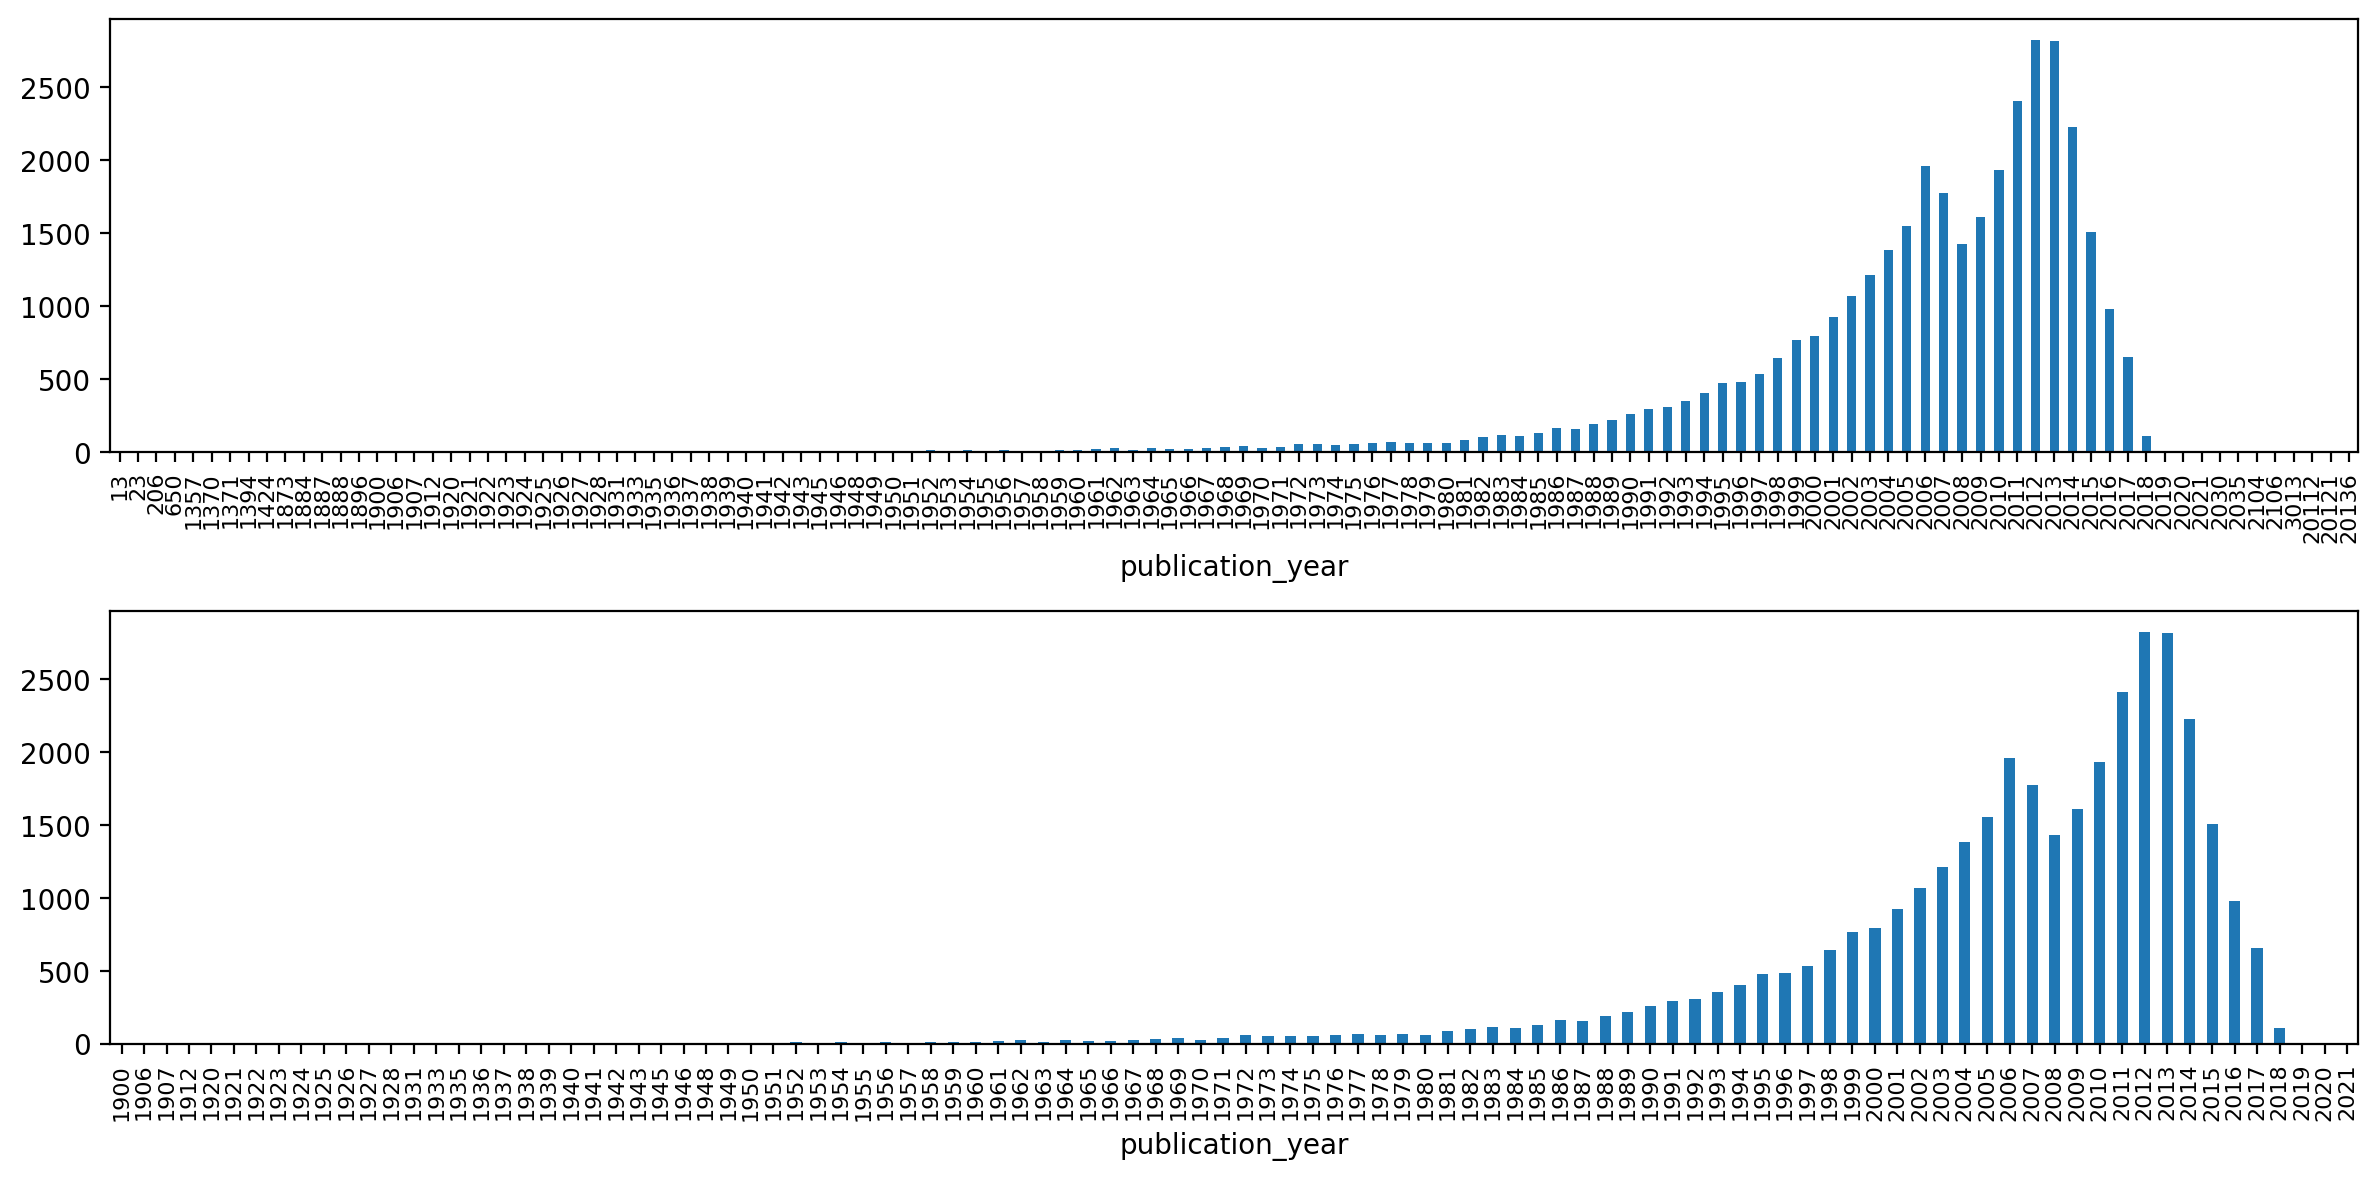

In [17]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

## События по месяцам

In [18]:
interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [19]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [20]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


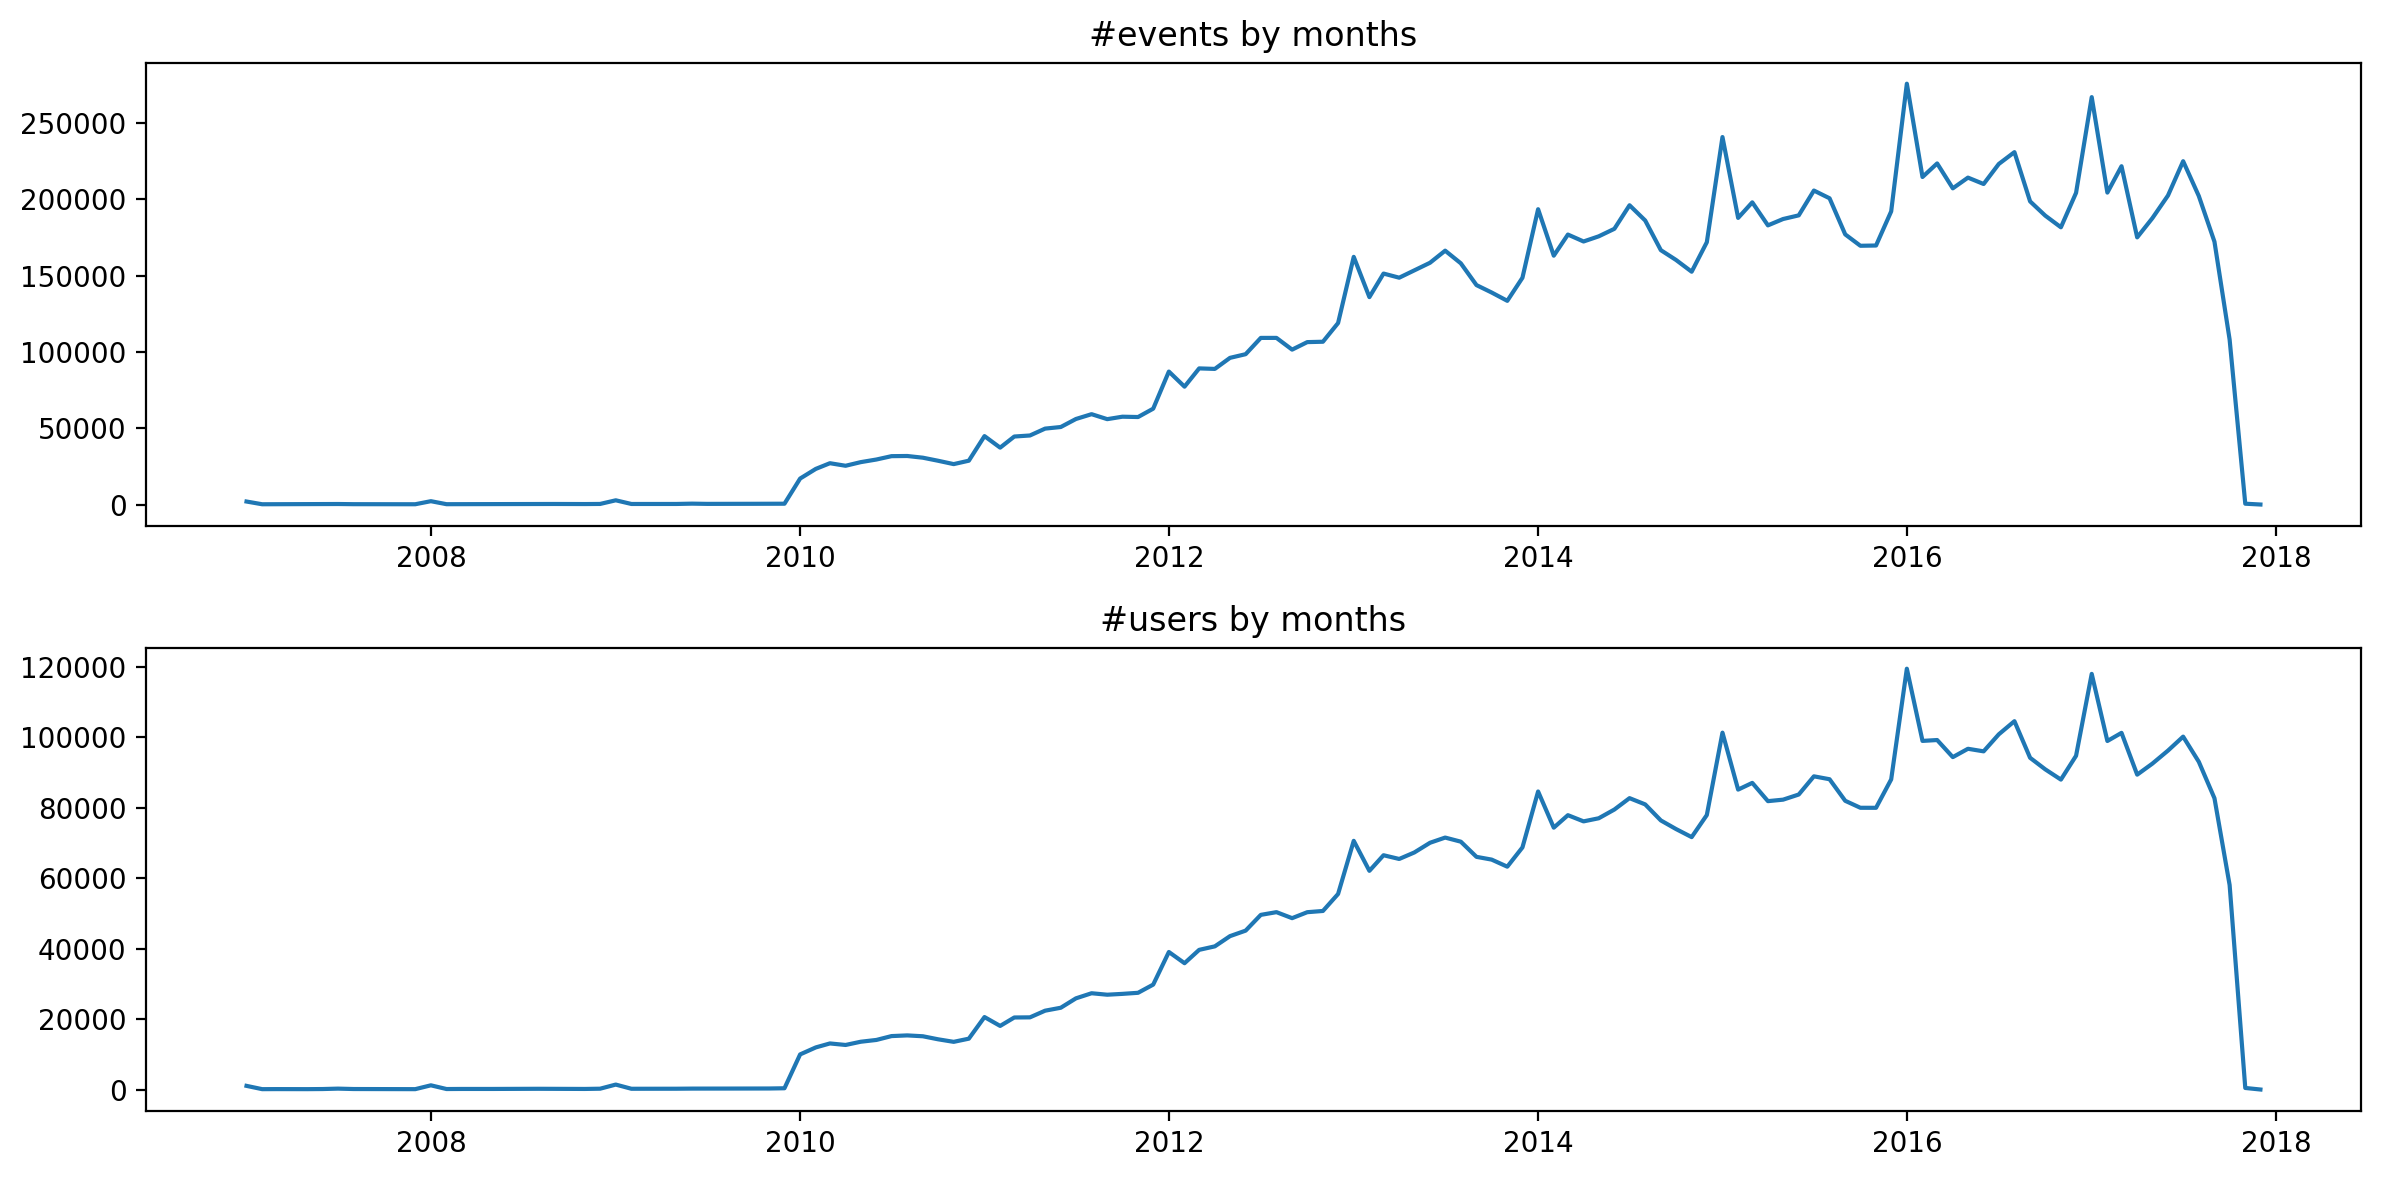

In [21]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

## Задание. Проведите EDA представленного датасета

Посмотрим на данные о событиях, какие поля есть.

In [22]:
show_dtypes(interactions)

,index,type,isna,0,1,2
0,is_read,bool,0,True,True,True
1,is_reviewed,bool,0,False,True,True
2,book_id,int64,0,22034,22318578,22551730
3,rating,int64,0,5,5,4
4,user_id,object,0,8842281e1d1347389f2ab93d60773d4d,8842281e1d1347389f2ab93d60773d4d,8842281e1d1347389f2ab93d60773d4d
5,started_at,object,0,2015-07-12,2015-06-07,2015-06-24
6,read_at,object,0,2015-07-17,2015-08-09,2015-07-11
7,started_at_month,object,0,2015-07-01,2015-06-01,2015-06-01


### Количетво пользователей

In [23]:
print(f'Количество уникальных пользователй: {interactions["user_id"].nunique()}')

Количество уникальных пользователй: 542657


### Среднее количество прочитанных книг на пользователя

In [24]:
users_books = interactions.pivot_table(
    index="user_id",
    aggfunc={"book_id": "nunique", "is_read": "sum"},
)

In [25]:
users_books

,book_id,is_read
user_id,,
00000377eea48021d3002730d56aca9a,30,30
00004584d524ec468619e81b176cc991,2,2
000079c580bbe45e1500acabe551b276,5,5
00009ab2ed8cbfceda5a59da40966321,1,1
00009e46d18f223a82b22da38586b605,96,96
...,...,...
ffff943e2e329be4f410d874aaa3ae7f,1,1
ffffbb062a8b208c9c1031b529c08f7a,8,8
ffffd81a724c0fa70ac37cd347c1c0f1,5,5


In [26]:
users_books.describe()

,book_id,is_read
count,542657.000000,542657.000000
mean,23.754294,23.754294
std,43.888135,43.888135
min,1.000000,1.000000
25%,2.000000,2.000000
50%,8.000000,8.000000
75%,25.000000,25.000000
max,3204.000000,3204.000000


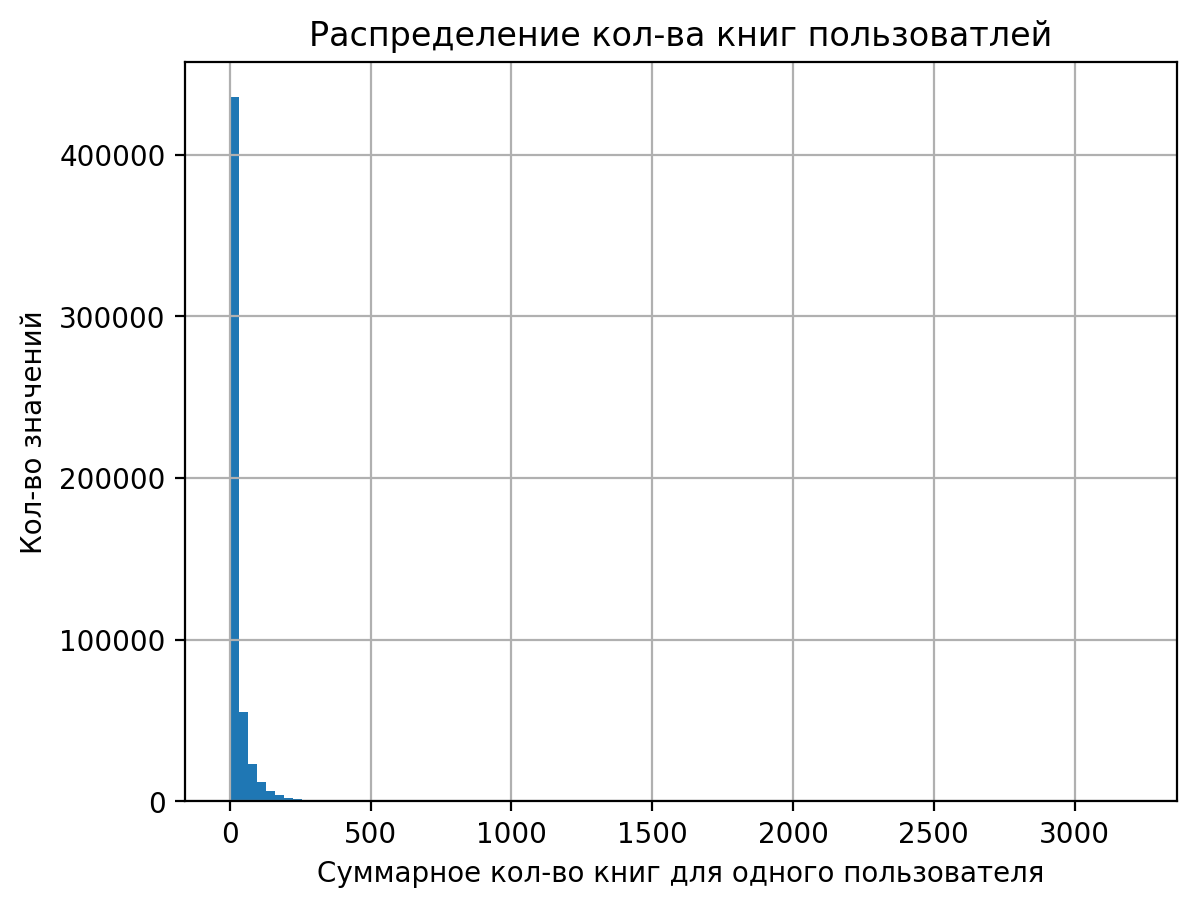

In [27]:
users_books["book_id"].hist(bins=100)
plt.title("Распределение кол-ва книг пользоватлей")
plt.xlabel("Суммарное кол-во книг для одного пользователя")
plt.ylabel("Кол-во значений")
plt.show()

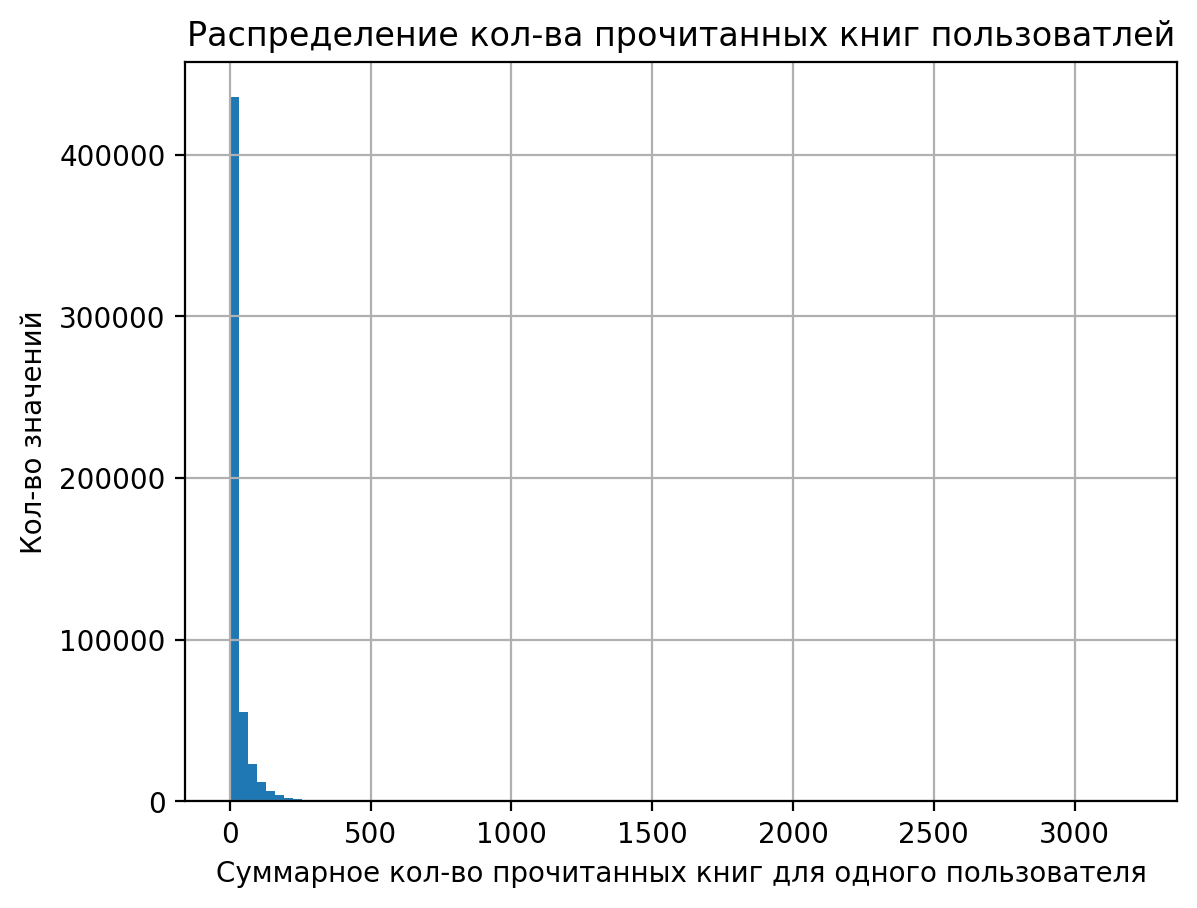

In [28]:
users_books["is_read"].hist(bins=100)
plt.title("Распределение кол-ва прочитанных книг пользоватлей")
plt.xlabel("Суммарное кол-во прочитанных книг для одного пользователя")
plt.ylabel("Кол-во значений")
plt.show()

In [29]:
interactions.nunique()

user_id             542657
book_id              41912
started_at            3988
read_at               4011
is_read                  1
rating                   6
is_reviewed              2
started_at_month       132
dtype: int64

**Признак `is_read` бесполезен**

In [30]:
users_books["book_id"].value_counts(normalize=True).sort_index().head(10)

book_id
1     0.157190
2     0.096967
3     0.070638
4     0.054060
5     0.044140
6     0.037171
7     0.032044
8     0.028056
9     0.024524
10    0.022097
Name: proportion, dtype: float64

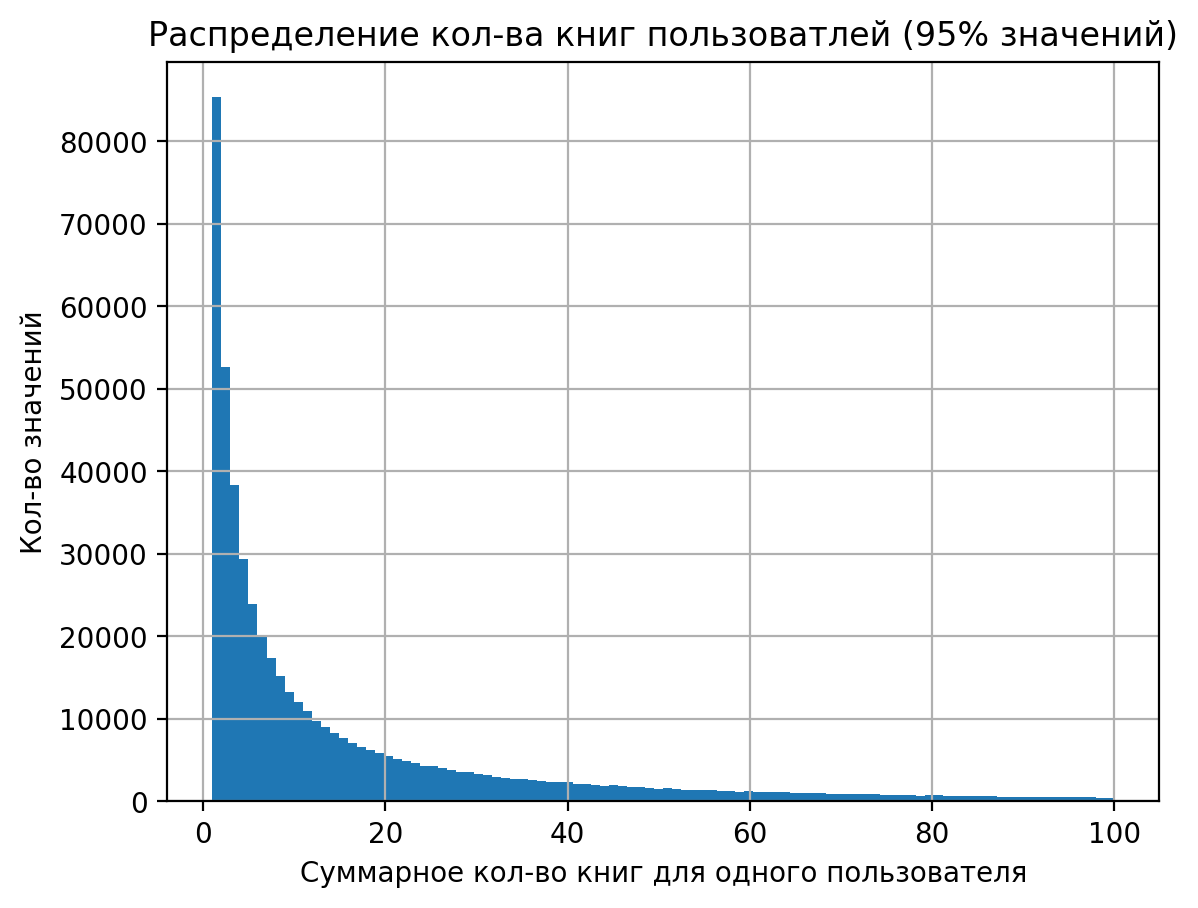

In [31]:
users_books.loc[users_books["book_id"] < users_books["book_id"].quantile(0.95), "book_id"].hist(bins=100)
plt.title("Распределение кол-ва книг пользоватлей (95% значений)")
plt.xlabel("Суммарное кол-во книг для одного пользователя")
plt.ylabel("Кол-во значений")
plt.show()

### Доля прочитанных книг, у которых нет рейтинга

In [32]:
interactions["rating"].isna().sum()

0

### Распределение рейтинга

In [33]:
interactions["rating"].value_counts(normalize=True).sort_index()

rating
0    0.081585
1    0.014256
2    0.052061
3    0.198956
4    0.353707
5    0.299434
Name: proportion, dtype: float64

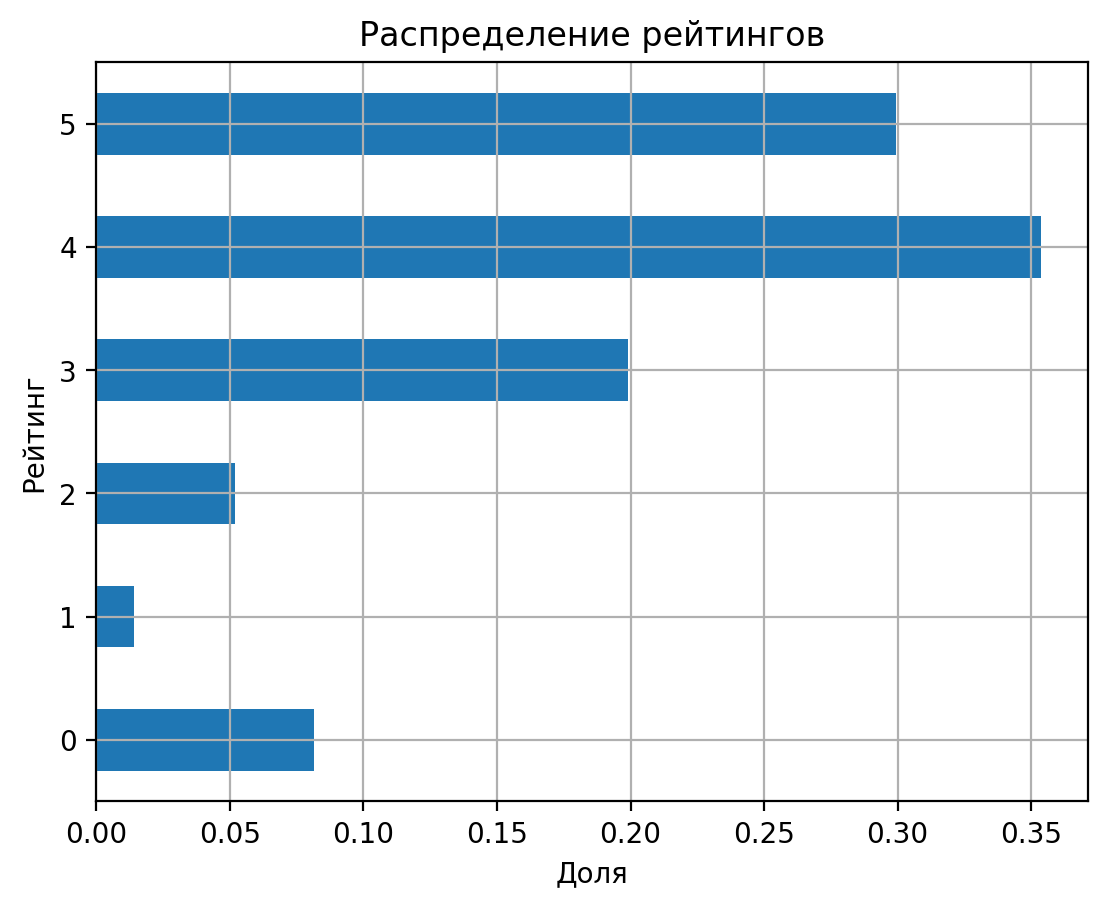

In [34]:
interactions["rating"].value_counts(normalize=True).sort_index().plot(kind="barh")
plt.grid()
plt.title("Распределение рейтингов")
plt.xlabel("Доля")
plt.ylabel("Рейтинг")
plt.show()

### Распределение популярности (долю пользователей, приходящуюся на одну книгу)

In [35]:
books_users = interactions.groupby("book_id", as_index=False)["user_id"].nunique()

In [36]:
books_users

,book_id,user_id
0,1,15037
1,2,16414
2,3,25125
3,5,19964
4,6,18438
...,...,...
41907,36381037,53
41908,36390016,1
41909,36411879,10
41910,36421066,1


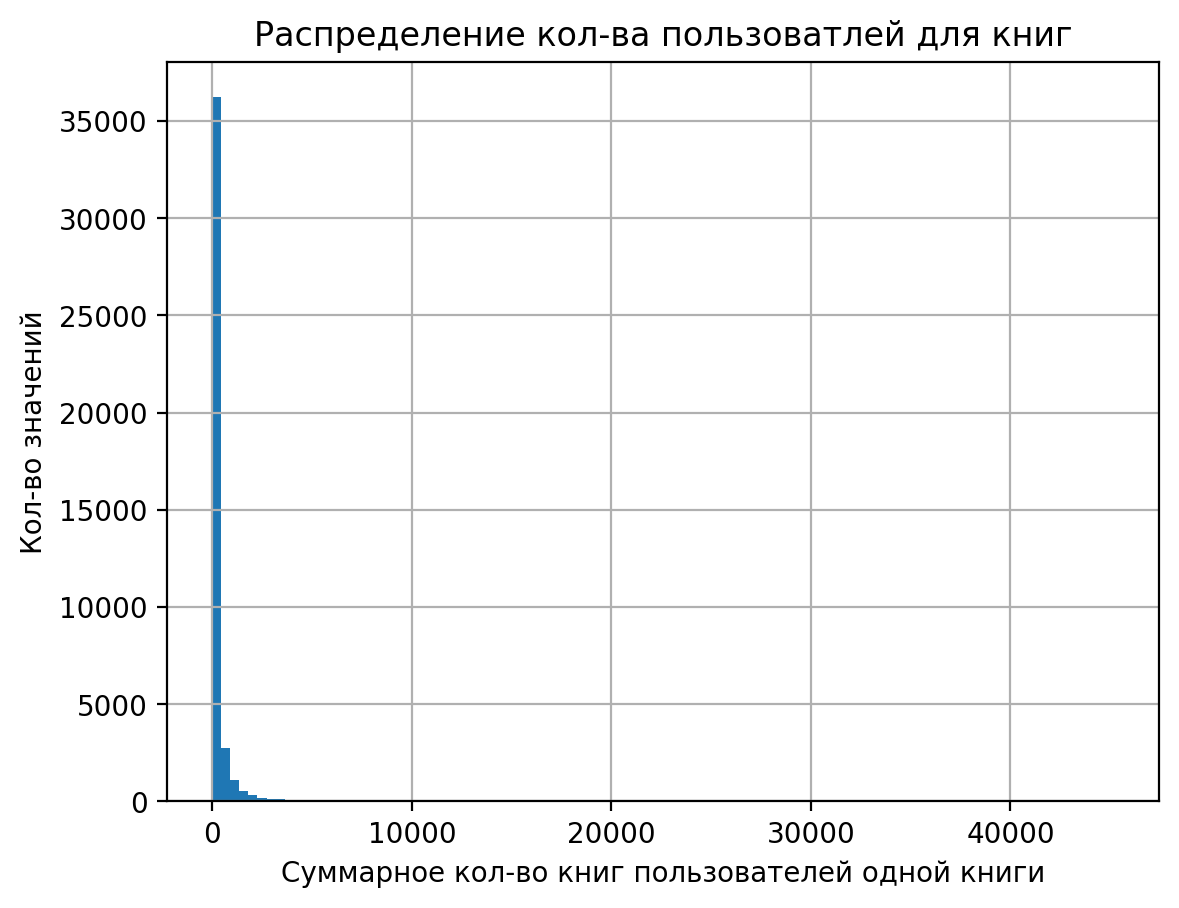

In [37]:
books_users["user_id"].hist(bins=100)
plt.title("Распределение кол-ва пользоватлей для книг")
plt.xlabel("Суммарное кол-во книг пользователей одной книги")
plt.ylabel("Кол-во значений")
plt.show()

In [38]:
books_users["user_id"].value_counts(normalize=True).sort_index().head(20)

user_id
1     0.039869
2     0.034000
3     0.026747
4     0.023215
5     0.021163
6     0.019446
7     0.017107
8     0.014721
9     0.014101
10    0.014363
11    0.012407
12    0.011500
13    0.011142
14    0.010761
15    0.010140
16    0.009639
17    0.009782
18    0.009639
19    0.008685
20    0.008232
Name: proportion, dtype: float64

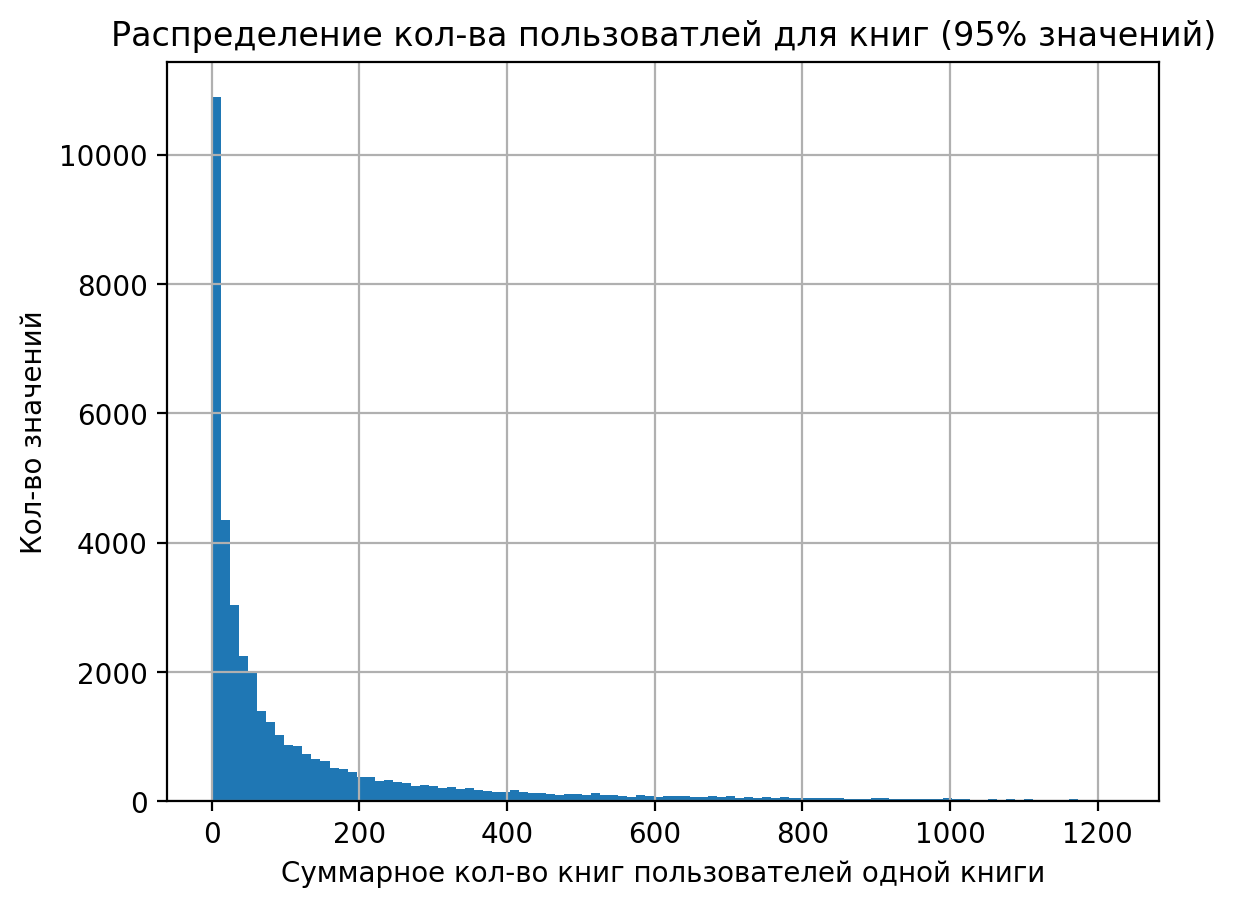

In [39]:
books_users.loc[books_users["user_id"] < books_users["user_id"].quantile(0.95), "user_id"].hist(bins=100)
plt.title("Распределение кол-ва пользоватлей для книг (95% значений)")
plt.xlabel("Суммарное кол-во книг пользователей одной книги")
plt.ylabel("Кол-во значений")
plt.show()

### Нестыковки в данных

In [40]:
(interactions["started_at"] > interactions["read_at"]).sum()

0

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)
- идентификатор `book_id` — в `item_id`, причём как в `items`, так и в `events`.

In [41]:
items = books.copy()
events = interactions.copy()

In [42]:
del books
del interactions

In [43]:
shape_origin = events.shape
shape_origin

(12890434, 8)

In [44]:
# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

In [45]:
# удалим события, для которых нет рейтинга

events = events[events["rating"] > 0].reset_index(drop=True)

In [46]:
# оставим события только c признаком is_read=True

events = events[events["is_read"]].reset_index(drop=True)

In [47]:
# оставим только тех пользователей, у которых две прочитанные книги и более.

regular_users = users_books.loc[users_books["book_id"] > 1].index
events = events[events["user_id"].isin(regular_users)]

In [48]:
# переименуем признаки

items = items.rename(columns={"book_id": "item_id"})
events = events.rename(columns={"book_id": "item_id"})

In [49]:
# заменим ИД пользователей

events["user_id_old"] = events["user_id"]
events = events.sort_values("user_id_old").reset_index(drop=True)
events["user_id"] = events["user_id_old"].factorize()[0] + 1_000_000

Результат

In [50]:
items.shape

(43312, 19)

In [51]:
items.head()

,item_id,author,title,description,genre_and_votes,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_year,country_code,language_code,format,is_ebook,isbn,isbn13,genre_and_votes_dict,genre_and_votes_str
3,6066819,Jennifer Weiner,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"{'Womens Fiction-Chick Lit': 739, 'Fiction': 442}",368,3.49,51184,3282,Atria Books,2009,US,eng,Hardcover,False,0743294297,9780743294294,"{'Academic': None, 'Academic-Academia': None, ...","Womens Fiction-Chick Lit 739, Fiction 442"
6,378460,Michael Halberstam,The Wanting of Levine,,"{'Politics': 1, 'Humor': 1}",<NA>,4.38,12,4,Berkley Publishing Group,1979,US,,Paperback,False,0425040887,9780425040881,"{'Academic': None, 'Academic-Academia': None, ...","Politics 1user, Humor 1user"
15,89375,"Don Piper, Cecil Murphey",90 Minutes in Heaven: A True Story of Death an...,As he is driving home from a minister's confer...,"{'Christian': 395, 'Nonfiction': 392, 'Religio...",<NA>,3.91,68157,2885,,<NA>,US,,,False,0800759494,9780800759490,"{'Academic': None, 'Academic-Academia': None, ...","Christian 395, Nonfiction 392, Religion 142, S..."
16,89376,Randy Alcorn,Heaven,What is Heaven really going to be like? What w...,"{'Christian': 225, 'Religion-Theology': 154, '...",533,4.26,7345,566,,<NA>,US,eng,,False,0842379428,9780842379427,"{'Academic': None, 'Academic-Academia': None, ...","Christian 225, Religion-Theology 154, Nonficti..."
17,89377,Jennifer L. Holm,Penny from Heaven,It's 1953 and 11-year-old Penny dreams of a su...,"{'Historical-Historical Fiction': 284, 'Childr...",288,3.98,6949,615,Random House Books for Young Readers,2006,US,,Hardcover,False,037583687X,9780375836879,"{'Academic': None, 'Academic-Academia': None, ...","Historical-Historical Fiction 284, Childrens-M..."


In [52]:
events.shape

(11768089, 9)

In [53]:
events.shape[0] / shape_origin[0]

0.9129319462789228

In [56]:
events.head()

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month,user_id_old
0,1000000,2,2009-07-12,2009-07-29,True,5,False,2009-07-01,00000377eea48021d3002730d56aca9a
1,1000000,3,2011-11-04,2011-11-20,True,5,False,2011-11-01,00000377eea48021d3002730d56aca9a
2,1000000,7190,2015-06-26,2015-08-11,True,5,False,2015-06-01,00000377eea48021d3002730d56aca9a
3,1000000,11366397,2015-07-12,2015-07-22,True,4,False,2015-07-01,00000377eea48021d3002730d56aca9a
4,1000000,13496,2015-09-13,2015-10-18,True,5,False,2015-09-01,00000377eea48021d3002730d56aca9a


In [58]:
events[events["user_id_old"]=='8f50136afeb65c55cec7b3d306c24b03']

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month,user_id_old
6589713,1250884,10572,2012-01-02,2013-01-27,True,5,False,2012-01-01,8f50136afeb65c55cec7b3d306c24b03
6589714,1250884,253058,2012-12-29,2013-01-22,True,3,True,2012-12-01,8f50136afeb65c55cec7b3d306c24b03


# Сохранение результатов

In [59]:
items.to_parquet("items.par")

In [60]:
events.to_parquet("events.par")